In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Обработка датасета

In [3]:
df = pd.read_csv('creditcard.csv', sep=',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#все строки с хотя бы одним пустым значением
empty_rows = df[df.isnull().any(axis=1)]
empty_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


<Axes: >

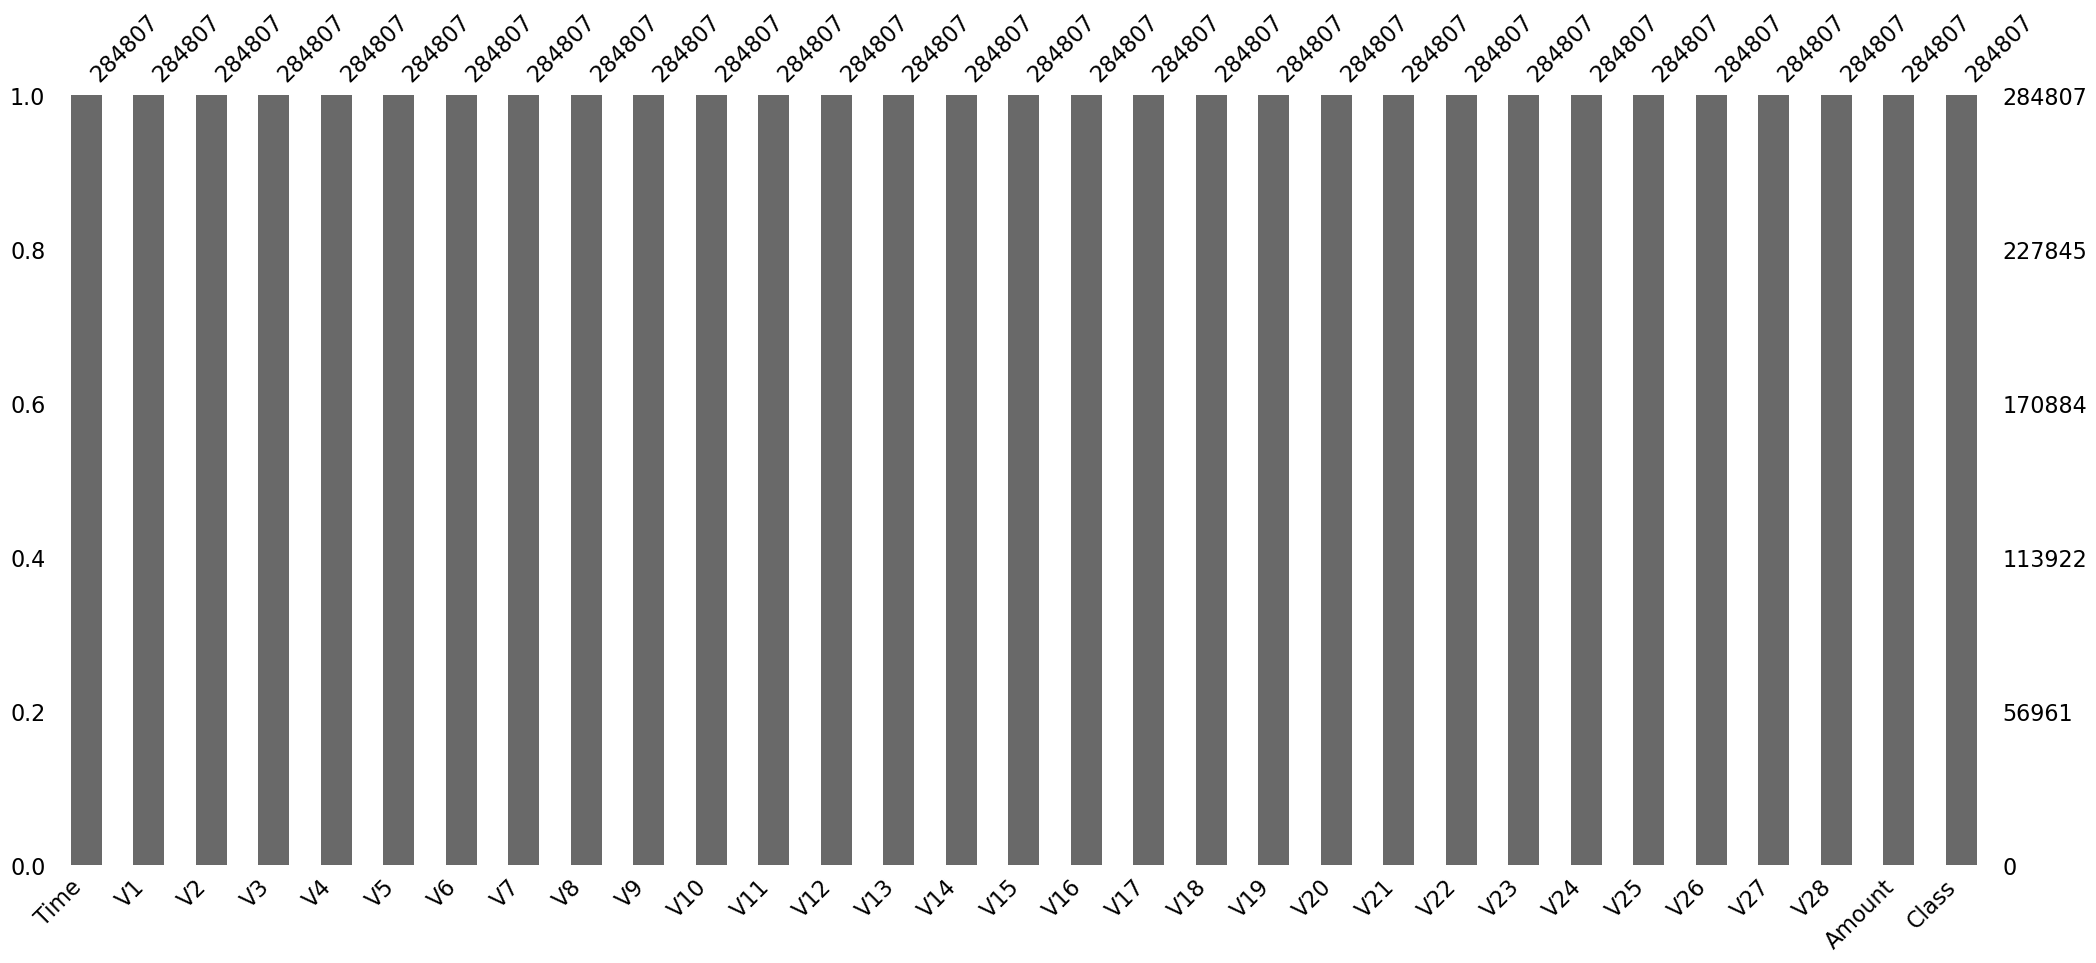

In [5]:
msno.bar(df)

<Axes: >

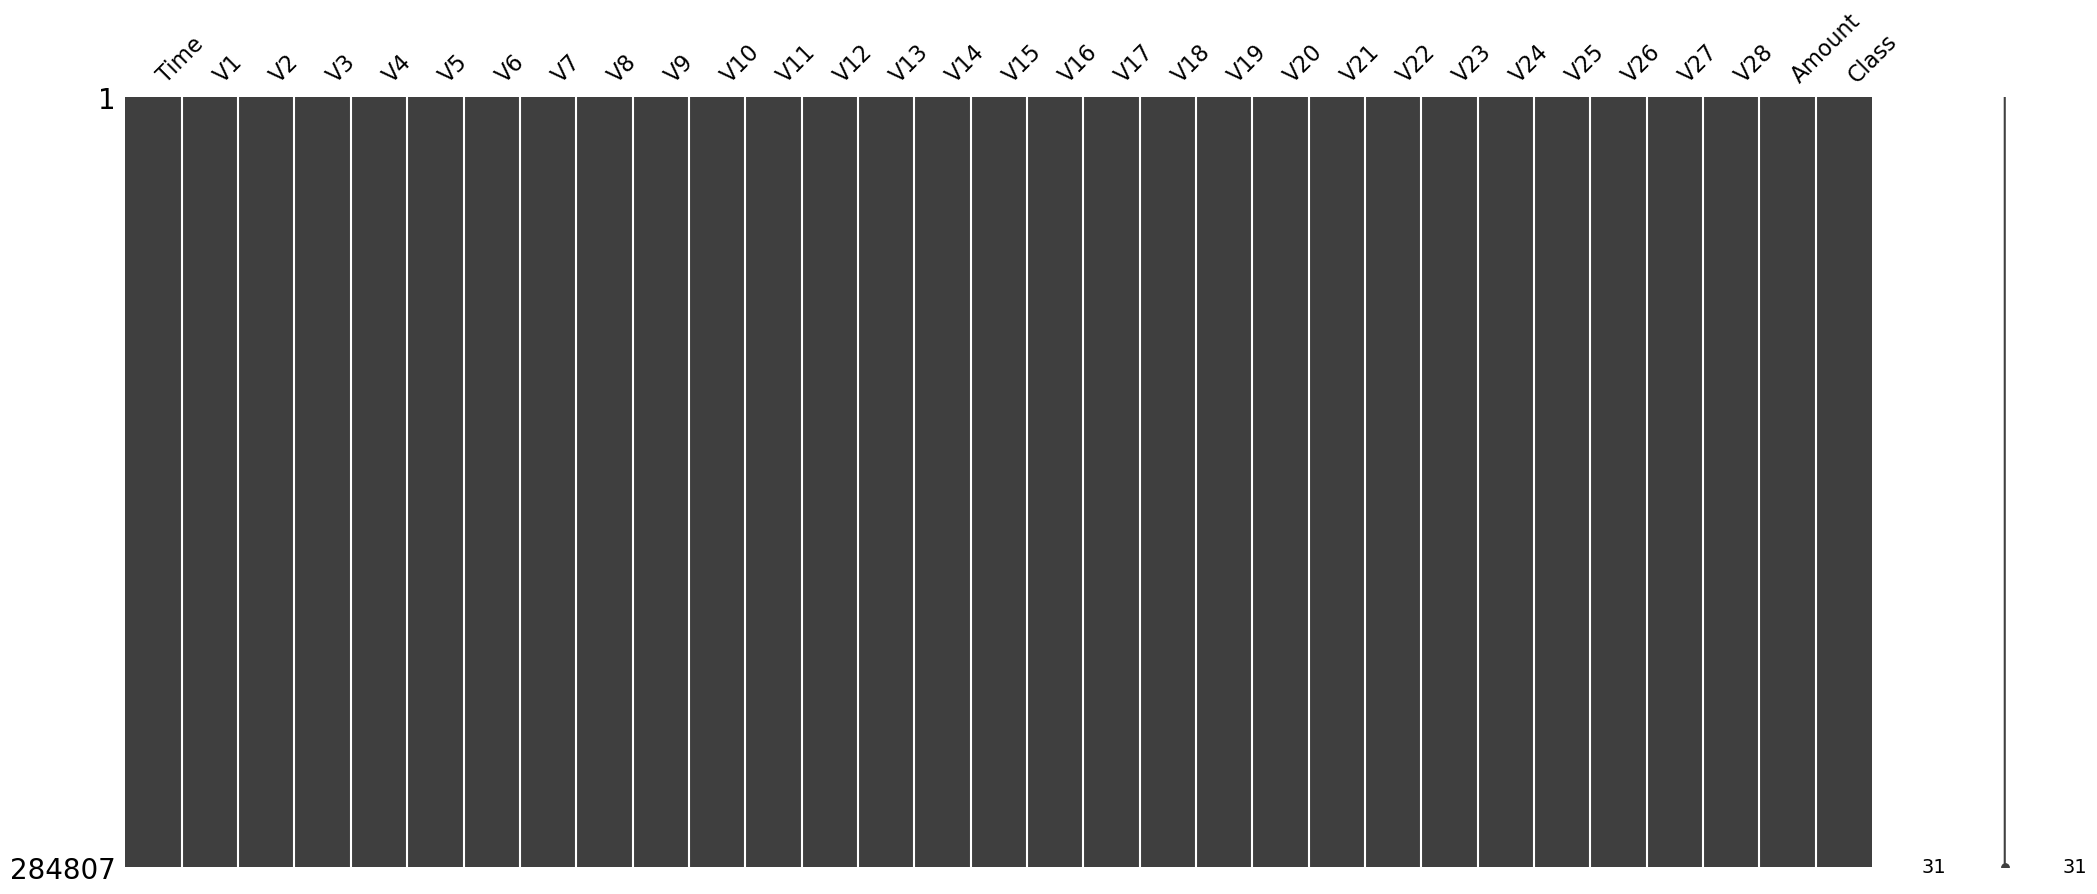

In [6]:
msno.matrix(df)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Анализ даннызх

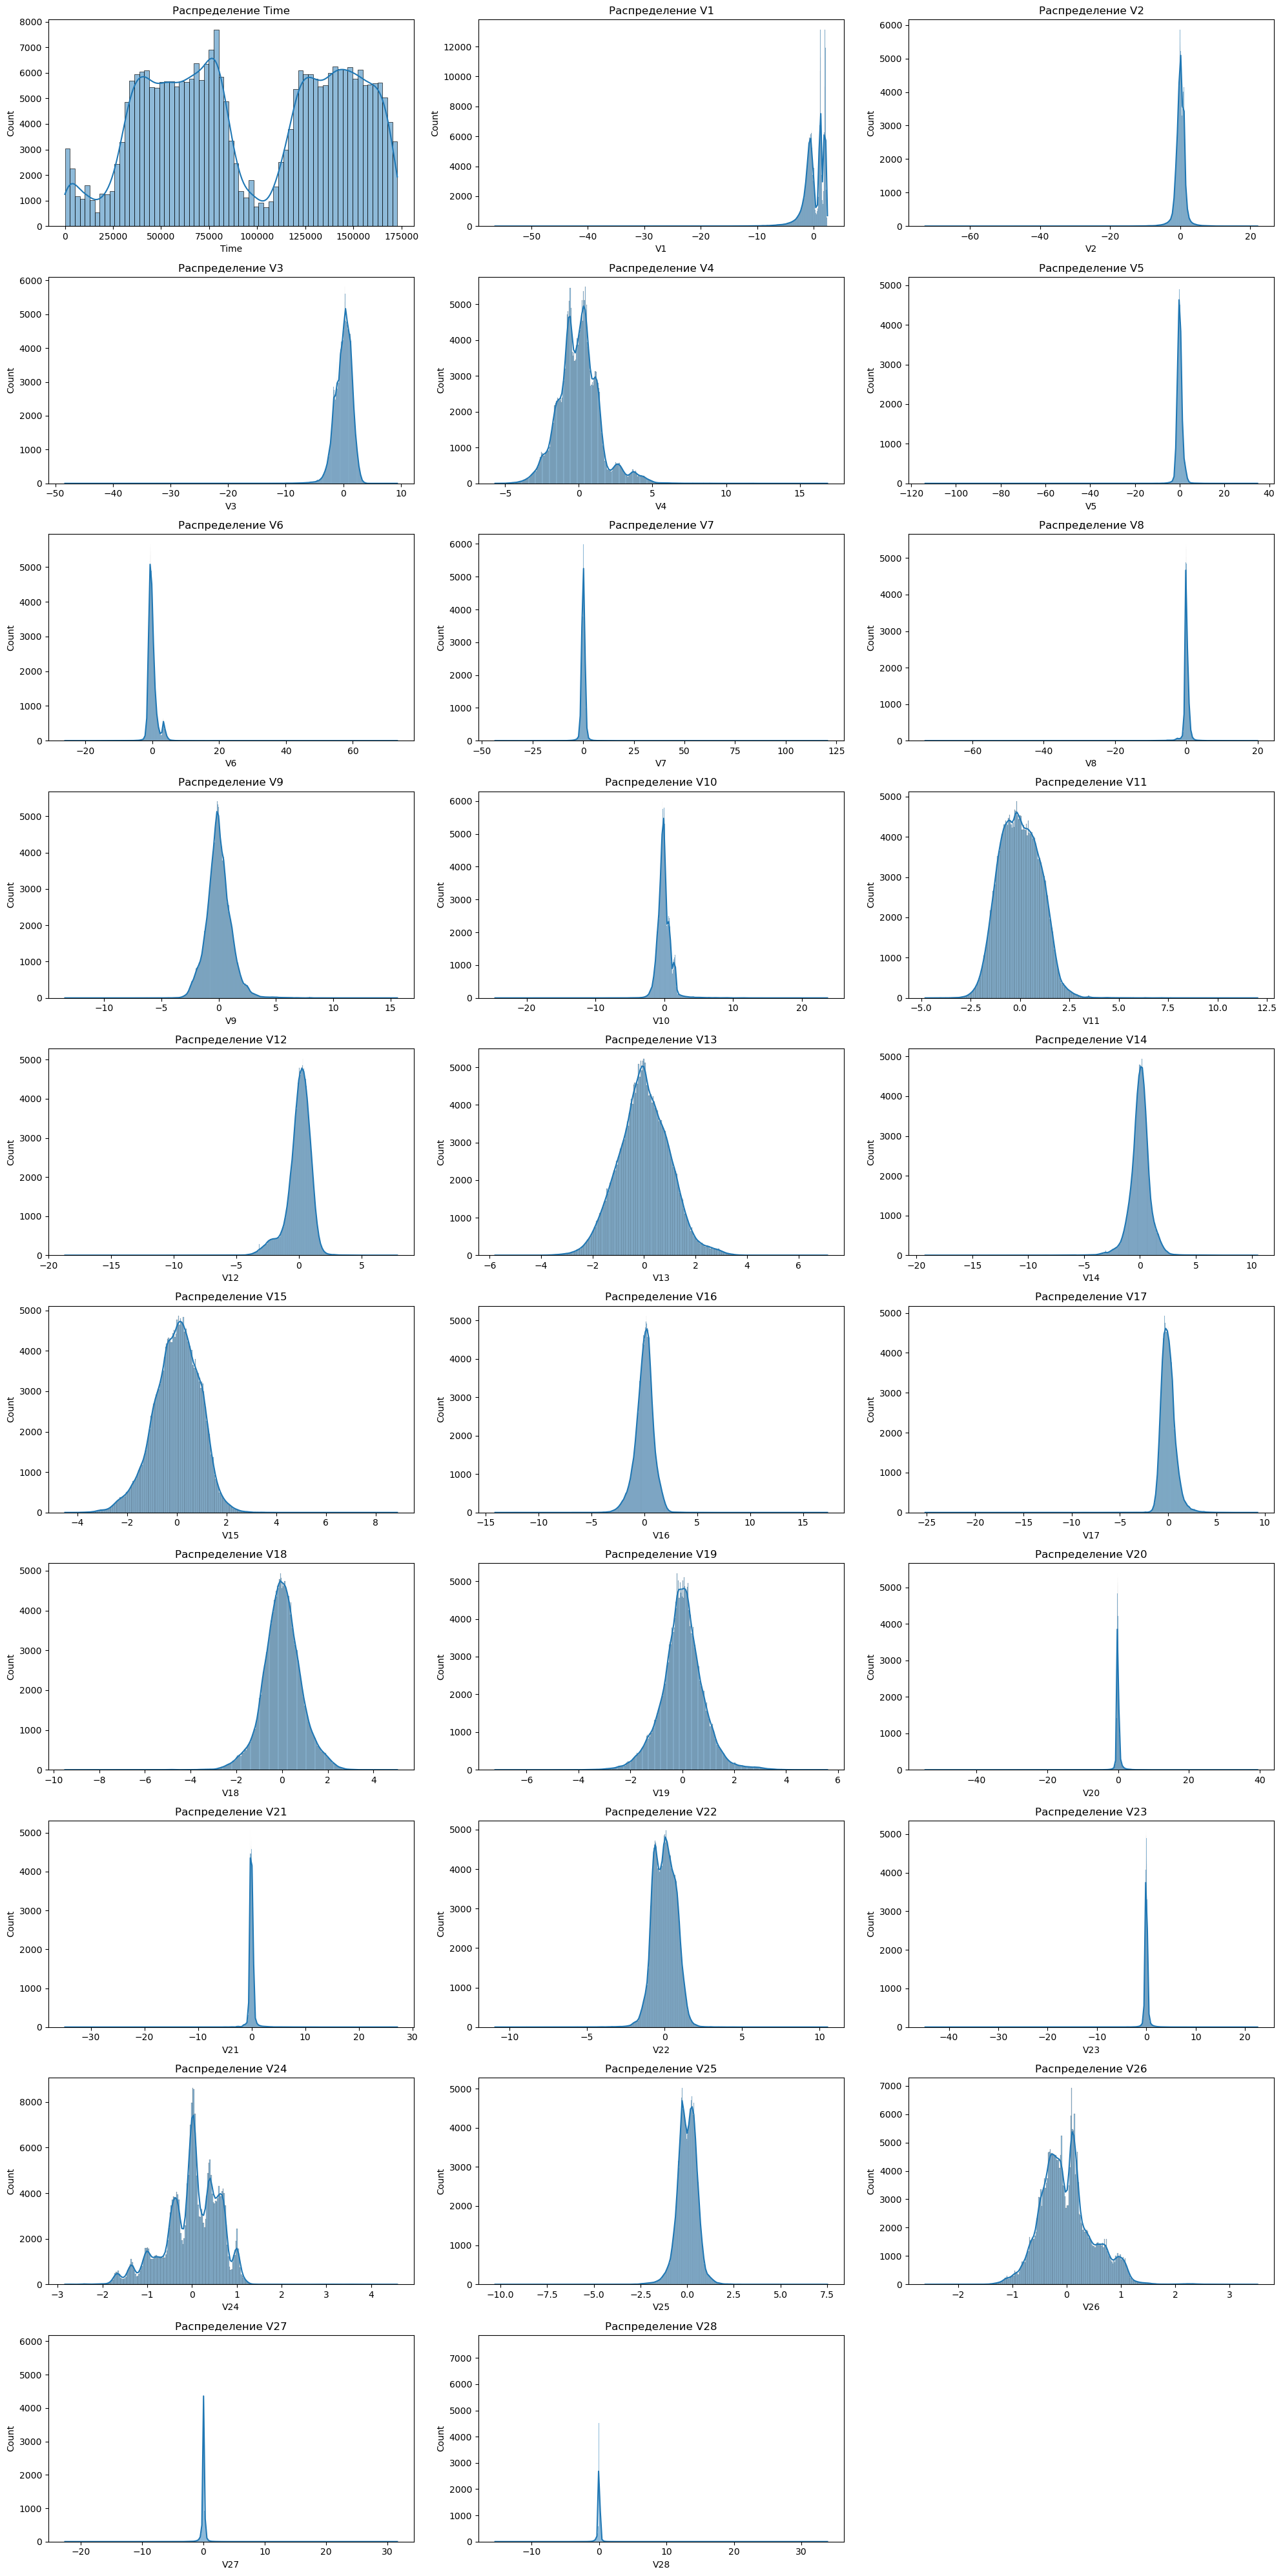

In [8]:
columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 
                   'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
                   'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(20, 40)) 

for i, column in enumerate(columns, 1):
    plt.subplot(10, 3, i)  # Создание сетки 10x3 для графиков
    sns.histplot(df[column], kde=True)  # Построение гистограммы с графиком плотности (KDE)
    plt.title(f'Распределение {column}')
    
plt.tight_layout() 
plt.show()

# IsolationForest

In [9]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['IF_outliers'] = isolation_forest.fit_predict(df)

# -1 означает аномалию, 1 — нормальный объект
df['IF_outliers'] = df['IF_outliers'].apply(lambda x: 1 if x == -1 else 0)

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


In [11]:
df[df.IF_outliers==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,1
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,1
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0,1
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284733,172726.0,-1.353026,0.289945,0.173684,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,...,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0,1
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0,1
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0,1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,1


Алгоритм посчитал половину датафрейма аномальной, попробуем уменьшить параметры

In [12]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['IF_outliers'] = isolation_forest.fit_predict(df)

# -1 означает аномалию, 1 — нормальный объект
df['IF_outliers'] = df['IF_outliers'].apply(lambda x: 1 if x == -1 else 0)
df[df.IF_outliers==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,1
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,1
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0,1
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284733,172726.0,-1.353026,0.289945,0.173684,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,...,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0,1
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0,1
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0,1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,1


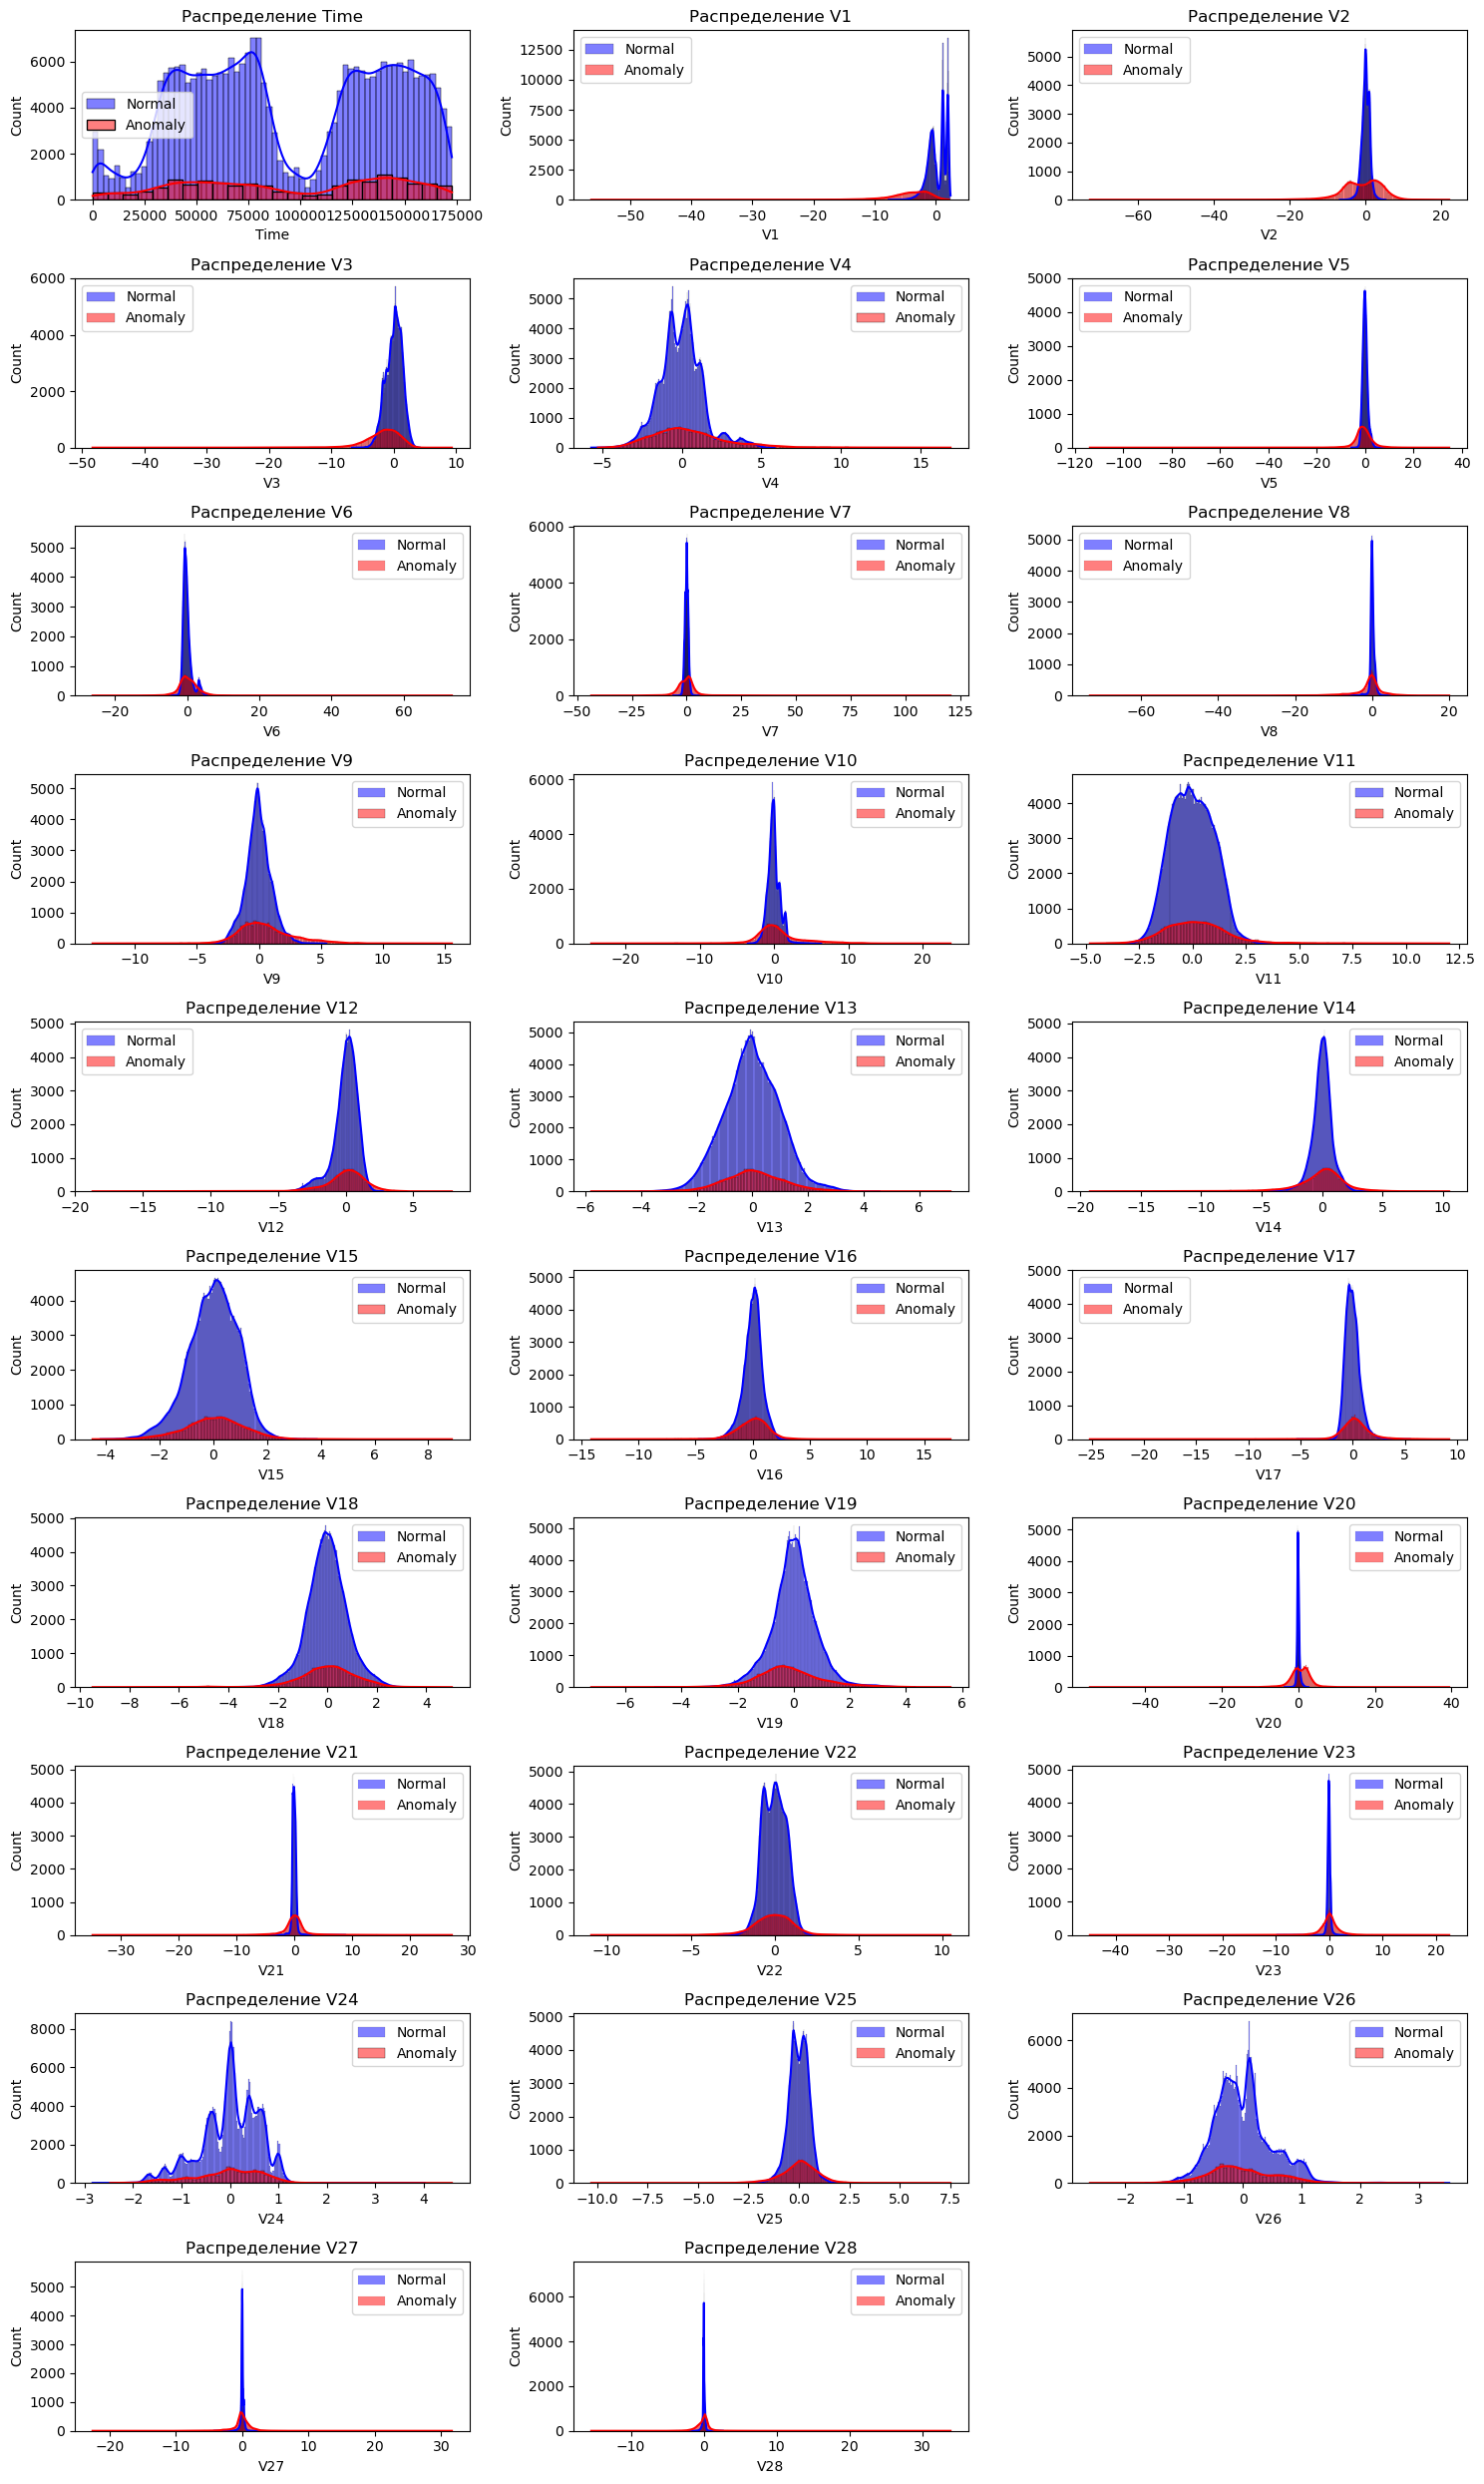

In [13]:
plt.figure(figsize=(15, 25))  

for i, column in enumerate(columns, 1):
    plt.subplot(10, 3, i)  
    
    sns.histplot(df[df['IF_outliers'] == 0][column], color='blue', kde=True, label='Normal', alpha=0.5)
    sns.histplot(df[df['IF_outliers'] == 1][column], color='red', kde=True, label='Anomaly', alpha=0.5)
    
    plt.title(f'Распределение {column}')
    plt.legend()  
plt.tight_layout()  
plt.show()


# LOF

In [14]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.01)
df['LOF_outliers'] = lof.fit_predict(df)


In [15]:
# Найти аномалии, обнаруженные только Isolation Forest
isolation_only = df[(df.IF_outliers == 1) & (df['LOF_outliers'] == 1)]

# Найти аномалии, обнаруженные только LOF
lof_only = df[(df['LOF_outliers'] == -1) & (df.IF_outliers == 1)]

print("Аномалии только Isolation Forest:")
isolation_only

Аномалии только Isolation Forest:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers,LOF_outliers
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,1,1
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,1,1
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0,1,1
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0,1,1
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284733,172726.0,-1.353026,0.289945,0.173684,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,...,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0,1,1
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0,1,1
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0,1,1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,1,1


In [16]:
print("Аномалии только LOF:")
lof_only

Аномалии только LOF:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers,LOF_outliers
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,1,-1
89,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0,1,-1
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0,1,-1
865,656.0,-1.789835,-5.835768,-1.472791,-0.851160,-2.433875,0.401415,1.354543,-0.288283,2.426889,...,-1.635914,-0.645651,0.112930,-0.726724,-0.184806,0.296762,1602.99,0,1,-1
1027,775.0,-3.900810,-3.098370,-0.213428,-2.678434,-2.927576,0.735688,1.591471,-3.465433,1.812757,...,-4.020300,0.191246,-0.204492,-1.076721,1.072961,-0.188497,1528.90,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283315,171514.0,-2.740984,-2.586374,-5.803083,-0.812563,-10.954787,6.380773,13.992227,-2.435900,-2.882009,...,1.669461,-0.860928,1.011840,1.058176,0.774090,-0.898281,2992.05,0,1,-1
283395,171560.0,-6.519366,-10.723215,-4.631726,0.074792,-9.973646,7.975968,12.793781,-0.541910,-2.328088,...,9.113598,-1.460900,0.602284,-0.693933,-1.111301,0.444162,3820.86,0,1,-1
283643,171759.0,-1.069643,-5.946056,-1.265560,2.010759,-3.136595,0.579610,0.657888,-0.262654,0.162373,...,-1.119588,0.006718,-1.019416,-0.753581,-0.175624,0.265802,1601.20,0,1,-1
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0,1,-1


In [17]:
lof_only_index = set(lof_only.index)
isolation_only_index = set(isolation_only.index)

# Находим общие индексы
common_indices = lof_only_index.intersection(isolation_only_index)

# Преобразуем множество общих индексов в список
common_indices_list = list(common_indices)

# Создаем новый DataFrame с общими строками
common_anomalies = df.loc[common_indices_list]

# Выводим новый DataFrame
common_anomalies


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,IF_outliers,LOF_outliers


Перед тем как определчть анолалии с помощью SVM уменьшим количество прзинаков с помощью t-SNE

# t-SNE

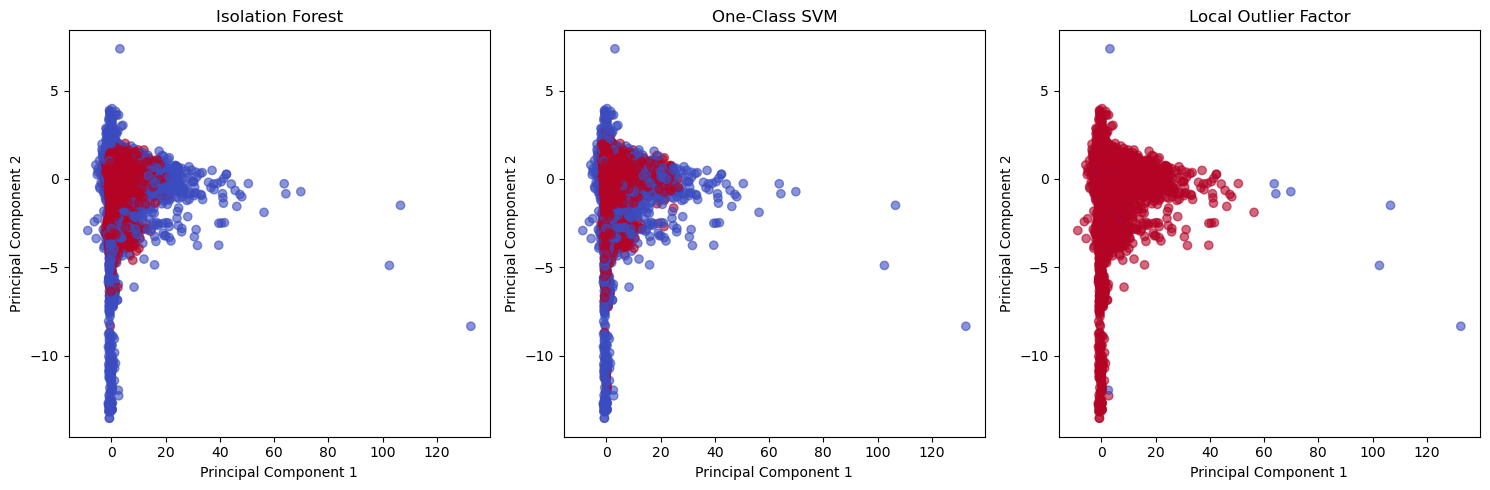

Explained variance for each component: [0.06751182 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276]
Total explained variance by PCA: 0.37785664740650765
PCA Components:
          V1        V2        V3        V4        V5        V6        V7  \
0 -0.168101 -0.392301 -0.155678  0.072887 -0.285219  0.159443  0.293306   
1  0.005285 -0.014255  0.022339 -0.010279  0.016025  0.043032  0.027908   
2 -0.004022  0.069478 -0.036387  0.028262 -0.016611 -0.058013 -0.050297   
3  0.057375 -0.074478  0.268649 -0.105220  0.087921  0.380401  0.070320   
4  0.000000 -0.007960 -0.161369  0.228486 -0.179087 -0.367460  0.014182   
5 -0.064868  0.055212  0.120777 -0.118019 -0.139642  0.157468  0.110014   
6 -0.000000  0.105154  0.057376 -0.165677  0.175544  0.510154 -0.165701   
7 -0.000000  0.016295  0.137835 -0.092307  0.114393  0.125316  0.012609   
8  0.000000  0.030219 -0.013148  0.093153 -0.049876 -0.076380  0.022565   
9  0.466348  0.035263 -0.150

In [18]:
# Стандартизация данных
scaler = StandardScaler()
features_scaled = scaler.fit_transform(columns)

# Уменьшение размерности
pca = PCA(n_components=10)
pca_results = pca.fit_transform(features_scaled)

# Создание нового DataFrame с результатами PCA
pca_df = pd.DataFrame(data=pca_results, columns=[f'Principal Component {i+1}' for i in range(10)])

# Обнаружим аномалии

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Isolation_Forest'] = iso_forest.fit_predict(features_scaled)

# One-Class SVM
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
df['OneClass_SVM'] = oc_svm.fit_predict(features_scaled)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['Local_Outlier_Factor'] = lof.fit_predict(features_scaled)



plt.figure(figsize=(15, 5))

# PCA визуализация с Isolation Forest
plt.subplot(1, 3, 1)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['Isolation_Forest'], cmap='coolwarm', alpha=0.6)
plt.title('Isolation Forest')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# PCA визуализация с One-Class SVM
plt.subplot(1, 3, 2)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['OneClass_SVM'], cmap='coolwarm', alpha=0.6)
plt.title('One-Class SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# PCA визуализация с Local Outlier Factor
plt.subplot(1, 3, 3)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['Local_Outlier_Factor'], cmap='coolwarm', alpha=0.6)
plt.title('Local Outlier Factor')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Дополнительный анализ значимости признаков
# Получаем значимость признаков из PCA
explained_variance = pca.explained_variance_ratio_
print("Explained variance for each component:", explained_variance)
print("Total explained variance by PCA:", np.sum(explained_variance))

# Печать коэффициентов PCA для анализа значимости признаков
components_df = pd.DataFrame(pca.components_, columns=features.columns)
print("PCA Components:\n", components_df)


In [19]:
# Применение методов обнаружения аномалий на результатах PCA

# Isolation Forest на PCA результатах
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Isolation_Forest'] = iso_forest.fit_predict(pca_results)

# One-Class SVM на PCA результатах
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
df['OneClass_SVM'] = oc_svm.fit_predict(pca_results)

# Local Outlier Factor на PCA результатах
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['Local_Outlier_Factor'] = lof.fit_predict(pca_results)


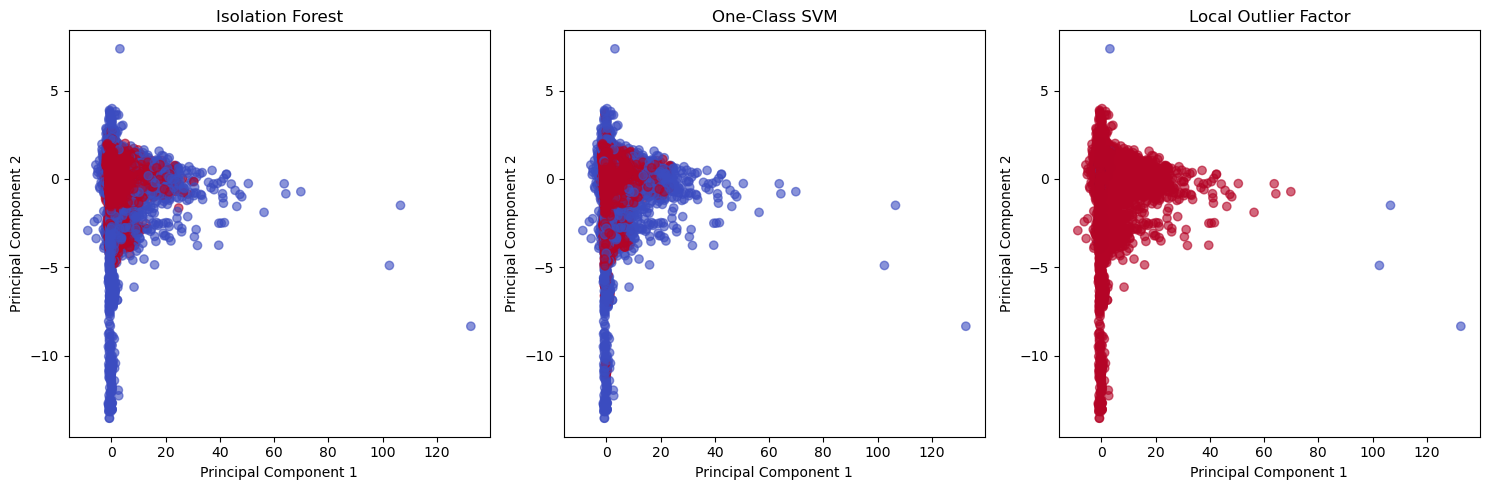

In [20]:
plt.figure(figsize=(15, 5))

# PCA с Isolation Forest
plt.subplot(1, 3, 1)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['Isolation_Forest'], cmap='coolwarm', alpha=0.6)
plt.title('Isolation Forest')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# PCA с One-Class SVM
plt.subplot(1, 3, 2)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['OneClass_SVM'], cmap='coolwarm', alpha=0.6)
plt.title('One-Class SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# PCA с Local Outlier Factor
plt.subplot(1, 3, 3)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
            c=df['Local_Outlier_Factor'], cmap='coolwarm', alpha=0.6)
plt.title('Local Outlier Factor')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


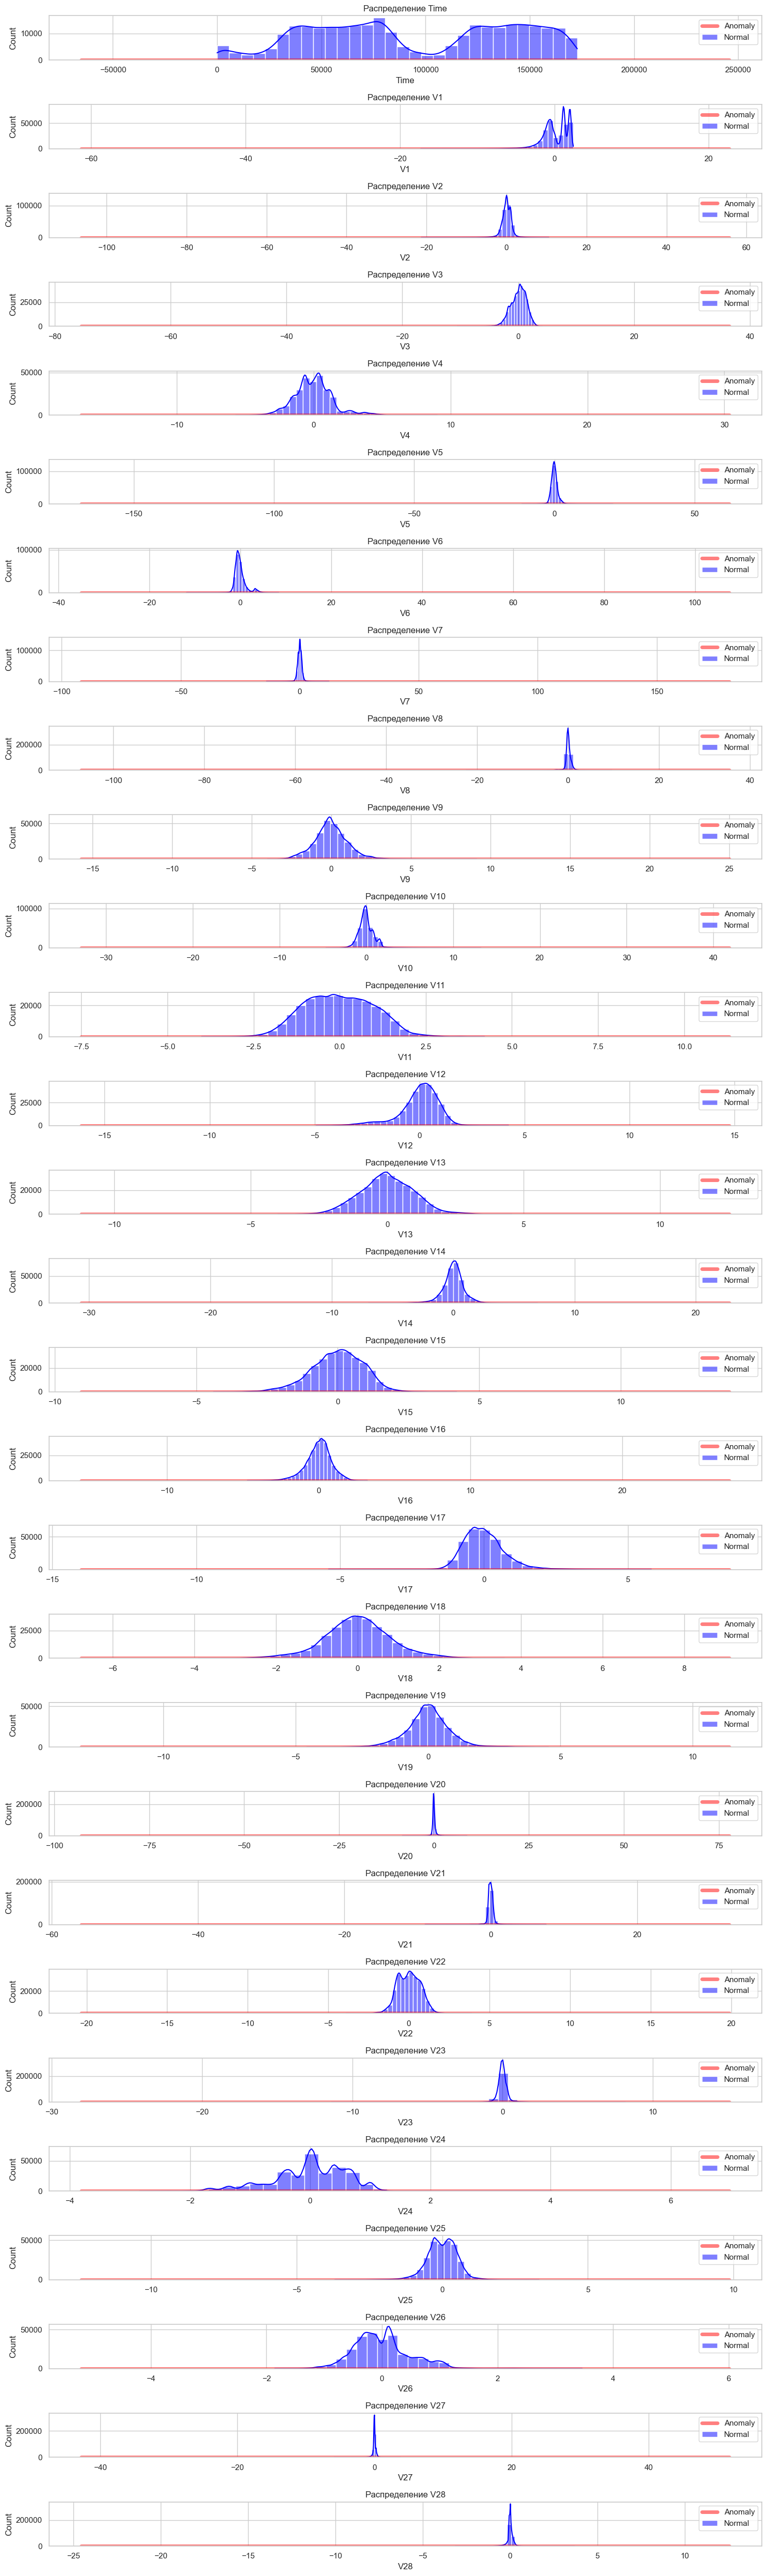

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 50))

# Цикл по каждому признаку
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  

    # Нормальные значения от всех алгоритмов
    normal_data = df[(df['Isolation_Forest'] == 1) & 
                     (df['OneClass_SVM'] == 1) & 
                     (df['Local_Outlier_Factor'] == 1)][column]

    # Аномалии, определенные всеми тремя методами
    combined_anomalies = (df['Isolation_Forest'] == -1) & \
                         (df['OneClass_SVM'] == -1) & \
                         (df['Local_Outlier_Factor'] == -1)

    anomaly_data = df[combined_anomalies][column]

    # Построение гистограммы для нормальных значений
    sns.histplot(normal_data, color='blue', kde=True, label='Normal', alpha=0.5, bins=30)

    # Построение KDE для аномальных значений с большей толщиной линии
    if not anomaly_data.empty:  
        sns.kdeplot(anomaly_data, color='red', label='Anomaly', linewidth=5, alpha=0.5)

    plt.title(f'Распределение {column}')
    plt.legend()  

plt.tight_layout()
plt.show()


Рекомендации:

Isolation Forest 
- Лучше подходит, если нужно быстро обработать большой объем данных, так как построен на древовидной системе, то есть умеет автоматически определять изолированные объекты, строя деревья и анализируя глубину каждого объекта в дереве.

One-Class SVM
- На данном датасете не очень подходит, так как в сравнении с методом  Isolation Forest выполняет тот же функционал за большое количество времени. Это происходит из-за обилия признаков.
- Замечено, что определяет больше аномалий. То есть более высокоточное определение аномалий
- Для более точного вычисления аномалий обяхательно использовать снижение размерности, например, как в данной работе, с помощью PCA.

Local Outlier Factor (LOF)
- Совершенно не подходит для данного датасета из-за размерности датасета. Работает медленнее остальных, так как вычисляет плотность вокруг каждого объекта.